In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df = pd.DataFrame

In [6]:
df = pd.read_csv('winequality-white.csv')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
1,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
2,6.2,0.32,0.16,7.0,0.045,30,136,0.9949,3.18,0.47,9.6,6
3,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
4,8.1,0.22,0.43,1.5,0.044,28,129,0.9938,3.22,0.45,11.0,6


In [ ]:
# Normalização dos dados y = (y - valor_min) / (valor_max - valor_min)

In [11]:
df_normalizado = pd.DataFrame

for col in df.columns:
    valor_min = df.min()
    valor_max = df.max()
    #print(valor_min, valor_max)
    df_normalizado = (df - valor_min) / (valor_max - valor_min)

In [13]:
df_normalizado.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.700000,0.207317,0.468750,0.333333,0.384615,0.655172,0.134615,0.620355,0.471154,0.280000,0.303571,0.5
1,0.700000,0.207317,0.468750,0.333333,0.384615,0.655172,0.134615,0.620355,0.471154,0.280000,0.303571,0.5
2,0.383333,0.256098,0.093750,0.338710,0.320513,0.655172,0.509615,0.604200,0.394231,0.320000,0.214286,0.5
3,0.400000,0.231707,0.375000,0.048387,0.371795,0.103448,0.471154,0.531502,0.509615,0.346667,0.196429,0.5
4,0.700000,0.134146,0.515625,0.043011,0.307692,0.586207,0.442308,0.515347,0.432692,0.293333,0.464286,0.5


In [14]:
df_normalizado.to_csv('winequality-white_normalizado.csv')

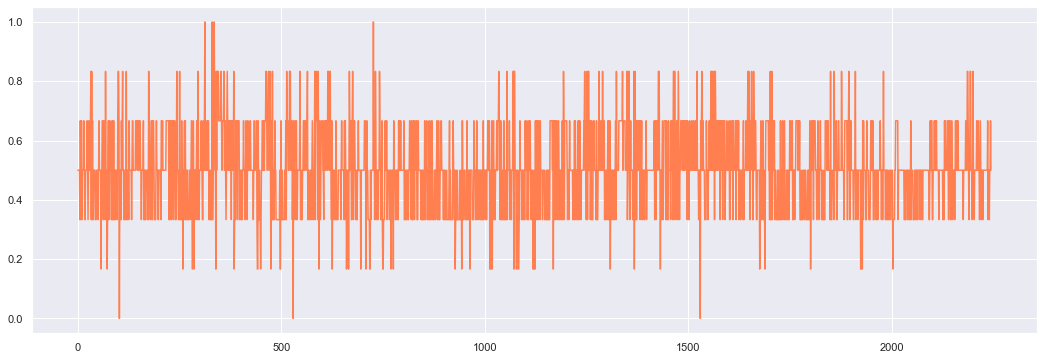

In [30]:
#Plot valores de qualificação normalizados
plt.figure(figsize=(18,6))
sns.lineplot(data=df_normalizado['quality'], color='coral')

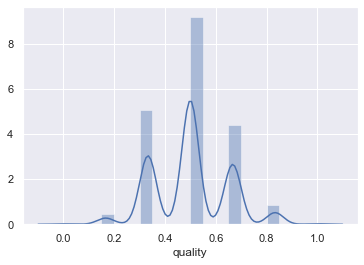

In [31]:
#Plot de distribuição dos valores de qualificação normalizados
sns.distplot(df_normalizado['quality'])

In [32]:
# Machine Learning utilizando modelo de Regressão Logística do Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import classification_report

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df_normalizado.drop('quality', axis=1), df_normalizado['quality'], test_size=0.2)

In [56]:
lab_enc = preprocessing.LabelEncoder()

In [57]:
y_train_encoded = lab_enc.fit_transform(y_train)

In [58]:
logmodel = LogisticRegression(solver='lbfgs', multi_class='auto')

In [59]:
#Treino
logmodel.fit(X_train,y_train_encoded)

C:\Users\kduarte\anaconda3\envs\k37\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
#Predição dos valores de teste
predictions = logmodel.predict(X_test)

In [61]:
y_test_encoded = lab_enc.fit_transform(y_test)

In [62]:
#Resultado / metricas
print(classification_report(y_test_encoded, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00       112
           2       0.23      0.09      0.13       207
           3       0.24      0.73      0.37       105
           4       0.18      0.75      0.29        12
           5       0.00      0.00      0.00         2

    accuracy                           0.23       449
   macro avg       0.11      0.26      0.13       449
weighted avg       0.17      0.23      0.15       449



C:\Users\kduarte\anaconda3\envs\k37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


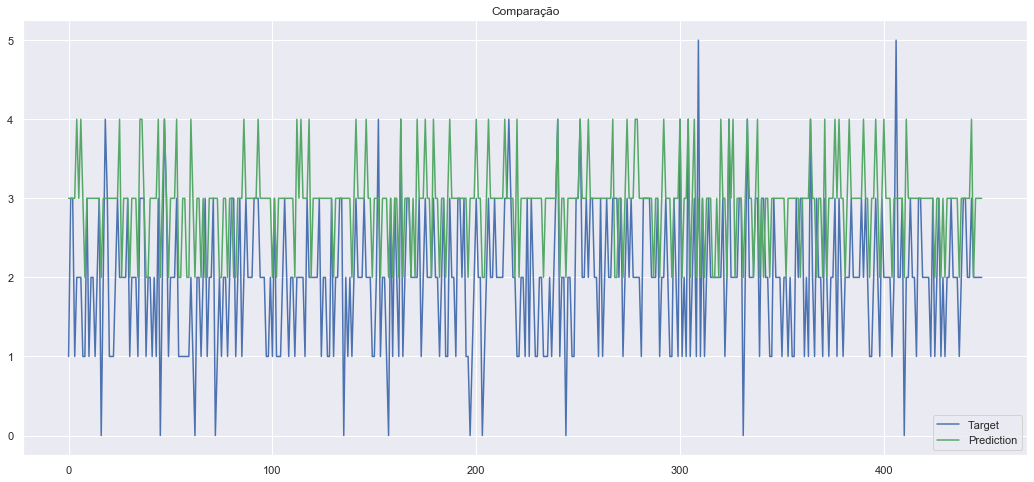

In [63]:
plt.figure(figsize=(18,8))
plt.plot(y_test_encoded, '-b')
plt.plot(predictions, '-g')
plt.title('Comparação')
plt.legend(['Target', 'Prediction'], loc='lower right')

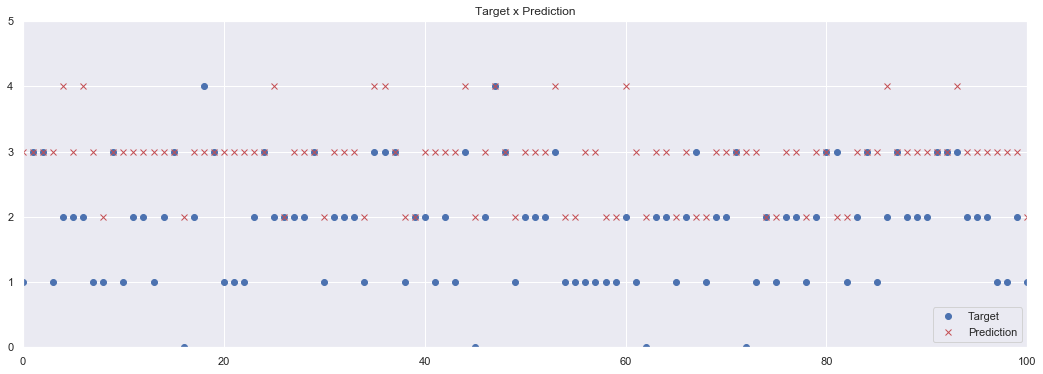

In [64]:
plt.figure(figsize=(18,6))
plt.axis([0, 100, -0, 5])
plt.plot(y_test_encoded, 'bo')
plt.plot(predictions, 'rx')
plt.title('Target x Prediction')
plt.legend(['Target', 'Prediction'], loc='lower right')